# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (11)

**13/11/2023**

# `ÁLEJANDRO SÁNCHEZ MONZÓN`

## Aplicar un caso de uso (*Regresión*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### **1- Análisis y filtrado de datos**

In [3]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# Convertir los datos en pandas dataframe
dataframe_x = pd.DataFrame(california.data, columns = california.feature_names)

# La variable dependiente es el target y la llamammos dataframe_y
dataframe_y = pd.DataFrame(california.target, columns = ['target'])

# Combinamos ambos para obtener un dataframe con todas las variables explicativas y la variable objetivo
df_california = dataframe_x.join(dataframe_y)

df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_california['Population'].quantile(0.25)
Q3 = df_california['Population'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_california['Population'] < lim_inf) | (df_california['Population'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_pop_out = df_california[filtro_oulier] 
df_pop_out

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26,1.300
185,2.1917,43.0,4.844029,1.091795,4367.0,3.547522,37.79,-122.23,1.128
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.710
460,1.4012,52.0,3.105714,1.060000,3337.0,9.534286,37.87,-122.26,1.750
485,1.6307,35.0,2.962687,1.001148,3276.0,1.880597,37.86,-122.26,2.536
...,...,...,...,...,...,...,...,...,...
20543,1.7311,33.0,3.882852,1.029994,3717.0,2.103565,38.55,-121.74,1.826
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.194
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.325
20604,2.3496,17.0,4.551392,0.962527,3265.0,3.495717,39.12,-121.54,0.650


In [5]:
df_corr = df_california.corr()
df_corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [6]:
# Filtramos las variable con menos correlación con la variable objetivo:
df_corr[df_corr['target'].abs() < 0.05]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967


In [7]:
df_california_filt = df_california.drop(labels=['Population', 'AveBedrms'], axis='columns')
df_california_filt

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


In [8]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_california_filt['AveRooms'].quantile(0.25)
Q3 = df_california_filt['AveRooms'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_california_filt['AveRooms'] < lim_inf) | (df_california_filt['AveRooms'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_room_out = df_california_filt[filtro_oulier] 
df_room_out

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
73,0.4999,46.0,1.714286,2.571429,37.81,-122.29,0.67500
155,8.8793,52.0,8.972868,3.337209,37.81,-122.23,4.10300
511,13.4990,42.0,8.928358,3.038806,37.82,-122.22,5.00001
512,12.2138,52.0,9.210227,2.843750,37.82,-122.23,5.00001
514,12.3804,52.0,9.122715,3.112272,37.82,-122.23,5.00001
...,...,...,...,...,...,...,...
20408,7.7889,26.0,8.730038,3.201521,34.19,-118.88,3.09900
20426,10.0472,11.0,9.890756,3.487395,34.18,-118.69,5.00001
20428,8.7288,6.0,8.715842,3.351485,34.23,-118.83,4.25800
20436,12.5420,10.0,9.873315,3.177898,34.21,-118.69,5.00001


In [9]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_room_out['AveRooms'].quantile(0.25)
Q3 = df_room_out['AveRooms'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos 
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_room_out['AveRooms'] < lim_inf) | (df_room_out['AveRooms'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_room_outliers = df_room_out[filtro_oulier] 
df_room_outliers

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
73,0.4999,46.0,1.714286,2.571429,37.81,-122.29,0.675
1024,3.1500,16.0,29.852941,1.980392,38.52,-120.00,1.406
1102,2.4028,17.0,31.777778,1.740741,40.06,-121.54,0.675
1234,4.4063,13.0,28.757282,2.446602,38.26,-120.33,1.558
1238,3.3542,10.0,28.112903,2.403226,38.29,-120.27,1.038
...,...,...,...,...,...,...,...
19736,6.1359,14.0,22.823529,2.058824,40.12,-121.78,1.063
19975,2.1029,11.0,23.994152,2.081871,36.12,-118.54,0.991
19976,3.1250,10.0,21.095238,2.285714,36.19,-118.37,0.713
20093,2.0625,37.0,24.669118,2.485294,38.12,-120.12,0.889


In [10]:
df_california_filt.drop(index=df_room_outliers.index).reset_index(drop=True)

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20550,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20551,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20552,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20553,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


In [11]:
# Filtramos el dataset, eliminando estos registros identificados como outliers
df_california_filt2 = df_california_filt.drop(index=df_room_outliers.index).reset_index(drop=True)
df_california_filt2

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20550,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20551,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20552,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20553,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


In [12]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_california_filt2['AveOccup'].quantile(0.25)
Q3 = df_california_filt2['AveOccup'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_california_filt2['AveOccup'] < lim_inf) | (df_california_filt2['AveOccup'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_ocup_out = df_california_filt2[filtro_oulier] 
df_ocup_out

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
88,1.2434,52.0,2.929412,4.658824,37.80,-122.27,5.00001
90,0.8668,52.0,2.443182,10.272727,37.80,-122.28,1.37500
91,0.7500,52.0,2.823529,5.617647,37.80,-122.28,1.62500
199,3.0257,52.0,4.046948,4.666667,37.78,-122.23,0.80800
269,3.8750,33.0,3.021277,12.234043,37.78,-122.18,2.25000
...,...,...,...,...,...,...,...
20268,5.0066,12.0,3.800000,4.600000,34.13,-119.05,2.75000
20308,5.7560,16.0,6.117493,5.240209,34.22,-118.88,3.02700
20428,2.6250,34.0,5.597403,5.077922,38.67,-121.63,2.25000
20442,1.4653,7.0,3.525794,8.886905,38.54,-121.79,3.10000


In [13]:
# Filtrar los valores atípicos basada en el rango intercuartil
Q1 = df_ocup_out['AveOccup'].quantile(0.25)
Q3 = df_ocup_out['AveOccup'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_ocup_out['AveOccup'] < lim_inf) | (df_ocup_out['AveOccup'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_ocup_outliers = df_ocup_out[filtro_oulier] 
df_ocup_outliers

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
90,0.8668,52.0,2.443182,10.272727,37.80,-122.28,1.375
269,3.8750,33.0,3.021277,12.234043,37.78,-122.18,2.250
459,1.4012,52.0,3.105714,9.534286,37.87,-122.26,1.750
1037,4.3029,16.0,6.090592,17.177700,38.42,-120.97,1.219
1065,3.4191,52.0,4.530612,11.295918,39.73,-121.85,1.375
...,...,...,...,...,...,...,...
19772,2.7969,18.0,6.335227,9.897727,36.42,-119.35,1.238
20036,3.1719,8.0,6.979221,13.212987,37.79,-120.45,1.154
20239,3.5625,31.0,4.386905,8.547619,34.25,-119.12,1.941
20267,4.0208,8.0,2.500000,19.312500,34.22,-119.09,0.525


In [14]:
df_california_filt2.drop(index=df_ocup_outliers.index).reset_index(drop=True)

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20471,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20472,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20473,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20474,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


In [15]:
df_california_filt3 = df_california_filt2.drop(index=df_ocup_outliers.index).reset_index(drop=True)
df_california_filt3

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20471,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20472,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20473,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20474,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


---

### **2-Creación de modelos** 

In [16]:
# Definimos los conjuntos de variables de entrada y la variable de salida
X_multiple = df_california_filt3.drop(['target'], axis='columns')
y_multiple = df_california_filt3['target']

In [17]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)

### Regresión lineal múltiple

### **`Ejercicio 11.1`**

Vamos a realizar el primer modelo de regresión:

**`11.1.1`** Construye como ejercicios anteriores en este bloque, un modelo de *Regresión lineal múltiple* para este conjunto de variables de entrada y la variable de salida.
   
**`11.1.2`** Consulta y visualiza los coeficientes del modelo ajustado.  

**`11.1.3`** Calcula diferentes métricas para evaluar tu modelo y explica si este modelo tiene un rendimiendo aceptable:  
- MAE
- MAPE
- MSE
- RMSE
- $R^2$

In [18]:
## Solución
# Ejercicio 11.1.1
from sklearn.linear_model import LinearRegression

lr_multiple = LinearRegression()

# Entrenamos el modelo
lr_multiple.fit(X_train, y_train)

# Conseguir la predicción (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_multiple = lr_multiple.predict(X_test)

In [19]:
## Solución
# Ejercicio 11.1.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_.round(3))
print('\n', 'Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[ 0.372  0.01  -0.008 -0.383 -0.454 -0.438]

 Valor de la intersección o coeficiente "b":
-34.682385778863036


In [20]:
## Solución
# Ejercicio 11.1.2
# Creamos una tabla de los parámetros del modelo ajustado
df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = lr_multiple.coef_
df_coef


,variables,coeficientes
0,MedInc,0.372411
1,HouseAge,0.009877
2,AveRooms,-0.007907
3,AveOccup,-0.382993
4,Latitude,-0.453575
5,Longitude,-0.437759


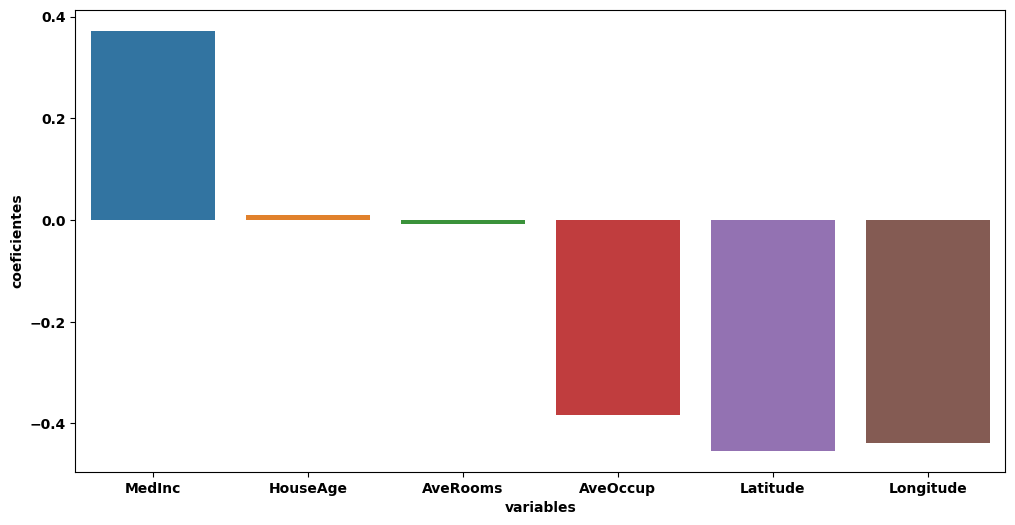

In [21]:
## Solución
# Ejercicio 11.1.2
# Visualizamos los coeficientes del modelo
sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

In [22]:
## Solución
# Ejercicio 11.1.3
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_multiple))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_multiple)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_multiple))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_multiple)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_multiple))

Mean Absolute Error: 0.5027019266156715
Mean Absolute Percentage Error: 31.01431672039416
Mean Squared Error: 0.4629156059962054
Root Mean Squared Error: 0.6803790164284944
R^2 coefficient of determination: 0.6591831046311578


> #### Explicación 11.1.3
> Los coeficientes de este modelo muestran que su rendimiento n**o es del todo el mejor**, y comparado con modelos de sesiones anteriores, deja bastante que desear. Tiene un porcentaje medio de error del **30% aproximadamente**, lo que quiere decir que los datos serán predichos con un porcentaje de **éxito de entorno al 70%**.
>
> Cabe destacar que el coeficiente de determinación no es del todo malo, 0.65 pueden ser valores para un coeficiente con un rendimiento medio. Sería necesario analizar el modelo más en detalle para conocer aun más su rendimiento. 

---

### Decision Trees

### **`Ejercicio 11.2`**

**`11.2.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training versus del test para el rango de profundidades entre `2` y `20` **no inclusive** indicando `random_state=100.

**`11.2.2`** Realiza una búsqueda del valor de hiperparámetro y el modelo óptimo usando la técnica de *Grid Search* para dicho rango de profundidades y compáralo con el valor sugerido del paso anterior.  
- para `KFold`  >>> `n_splits=10` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100`  

**`11.2.3`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
- MAE
- MAPE
- MSE
- RMSE
- $R^2$    

**`11.2.4`** Define una función que coja la profundidad máxima para un árbol y dibuje el *Learning Curve* que visualiza la evolución del rendimiento del modelo tanto en training como en test, en función del tamaño de subconjuntos de datos de entrenamiento que se aumentan desde `20` puntos **de 10 en 10** hasta considerar todos los datos de training.

**`11.2.5`** Saca la gráfica de el *Learning Curve* para el modelo óptimo, usando la función definida en el paso anterior y explica si este modelo tiene preferencia o no, comparando con modelos anteriores.

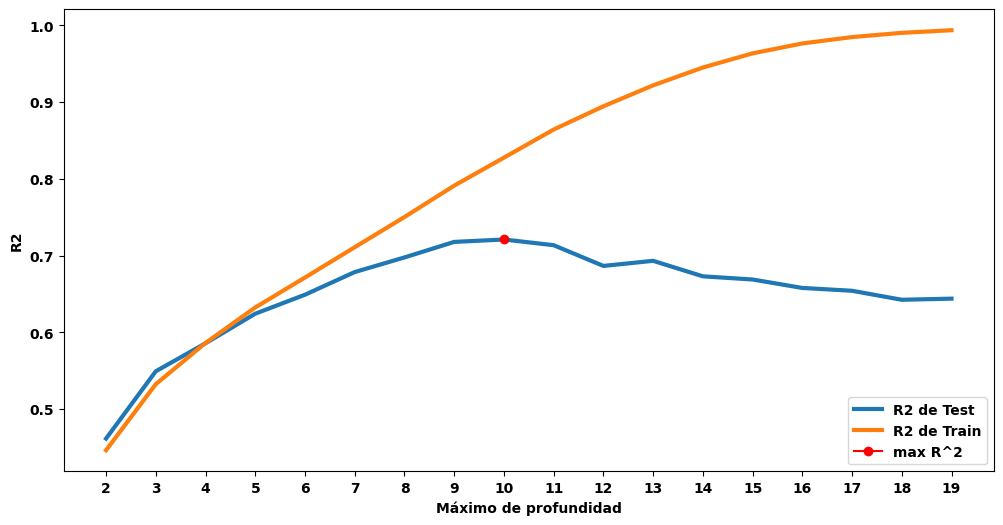

In [23]:
## Solución
# Ejercicio 11.2.1
from sklearn.tree import DecisionTreeRegressor

hiper_param_11_2 = np.arange(2,20)
    
train_r2_11_2 = np.zeros(hiper_param_11_2.size) 
test_r2_11_2 = np.zeros(hiper_param_11_2.size) 

for i in range(hiper_param_11_2.size):
    modelo_arbol_11_2 = DecisionTreeRegressor(max_depth=hiper_param_11_2[i], random_state=100)
    modelo_arbol_11_2.fit(X_train, y_train)
    train_r2_11_2[i] = r2_score(y_train, modelo_arbol_11_2.predict(X_train))
    test_r2_11_2[i] = r2_score(y_test, modelo_arbol_11_2.predict(X_test))

plt.plot(hiper_param_11_2, test_r2_11_2, linewidth=3, label='R2 de Test')
plt.plot(hiper_param_11_2, train_r2_11_2, linewidth=3, label='R2 de Train')
plt.plot(hiper_param_11_2[np.argmax(test_r2_11_2)], max(test_r2_11_2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_11_2)
plt.xlabel('Máximo de profundidad')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

In [24]:
## Solución
# Ejercicio 11.2.2
from sklearn.model_selection import GridSearchCV, KFold

folds_11_2 = KFold(n_splits=10, shuffle=True, random_state=111) 

modelo_11_2 = DecisionTreeRegressor(random_state=100)
params = {"max_depth":list(range(2,20))} 

modelo_grid_11_2 = GridSearchCV(estimator=modelo_11_2,
                          param_grid=params,
                          scoring='r2',
                          cv=folds_11_2,
                          n_jobs=-1)

modelo_grid_11_2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]},
             scoring='r2')

In [25]:
y_pred_11_2 = modelo_grid_11_2.predict(X_test)
y_pred_11_2

array([1.89837125, 0.84544175, 4.27963909, ..., 0.64510563, 1.60209005,
       1.40035124])

In [26]:
print("Hiperparámetro óptimo (profundidad):", modelo_grid_11_2.best_params_)
print("Modelo óptimo:", modelo_grid_11_2.best_estimator_)

Hiperparámetro óptimo (profundidad): {'max_depth': 9}
Modelo óptimo: DecisionTreeRegressor(max_depth=9, random_state=100)


> #### Explicación 11.2.2
> Dada la curva de complejidad, podemos observar que para el conjunto de test, el valor de **profundidad 9** es el que presenta un coeficiente de R2 más alto (**0.7 aproximadamente**). Segun la gráfica del ejercicio 11.2.1, el valor más optimo de profundidad es **10**. Esta diferencia puede deberse a la forma en la que GridSearchCV realiza la búsqueda del mejor hiperpárametro, dnde dentro de su fold, el valor más óptimo quiza si que **sea 9 y no 10**.

In [27]:
## Solución
# Ejercicio 11.2.3
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_11_2))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_11_2) * 100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_11_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_11_2)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_11_2))

Mean Absolute Error: 0.4177865134351003
Mean Absolute Percentage Error: 24.299386558778192
Mean Squared Error: 0.3832540620168775
Root Mean Squared Error: 0.6190751666937364
R^2 coefficient of determination: 0.7178331042156298


> #### Explicación 11.2.3
> Con base en los valores de estas métricas, podemos decir que este modelo es levemente mejor que el anterior, con un coeficiente de determinación **0.5 mayor**, y un porcentaje medio de error **más bajo (0.24% aproximadamente)**. Esto nos da a entender que este modelo será, a priori, **más eficiente que el modelo trabajado en el ejercicio anterior**, pero siguen existiendo modelos que hemos desarrollado en otras sesiones y que presentan rendmientos mejores.
>
> En resumen, debemos seguir estudiando opciones y tratar de comprender cual es el equilibrio correcto que buscamos.

In [28]:
## Solución
# Ejercicio 11.2.4
def curva_aprendizaje_11_2(profundidad: int):
    hiper_parametro_11_2 = int(profundidad)   
    modelo_arbol_11_2 = DecisionTreeRegressor(max_depth=hiper_parametro_11_2, random_state=100)
    
    samples = np.arange(start=20, stop=X_train.shape[0]+1, step=10)

    train_R2_11_2 = np.zeros(samples.size) 
    test_R2_11_2 = np.zeros(samples.size)

    for i in range(samples.size):
        modelo_arbol_11_2.fit(X_train[:samples[i]], y_train[:samples[i]])

        train_R2_11_2[i] = r2_score(y_train[:samples[i]], modelo_arbol_11_2.predict(X_train[:samples[i]])) 
        test_R2_11_2[i] = r2_score(y_test, modelo_arbol_11_2.predict(X_test))

    plt.plot(samples, test_R2_11_2, label = 'R2 de Test')
    plt.plot(samples, train_R2_11_2, label = 'R2 de Train')
    plt.title('Curva de aprendizaje para la profundidad = %s' % hiper_parametro_11_2)
    plt.xlabel('Tamaño de entrenamiento')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()

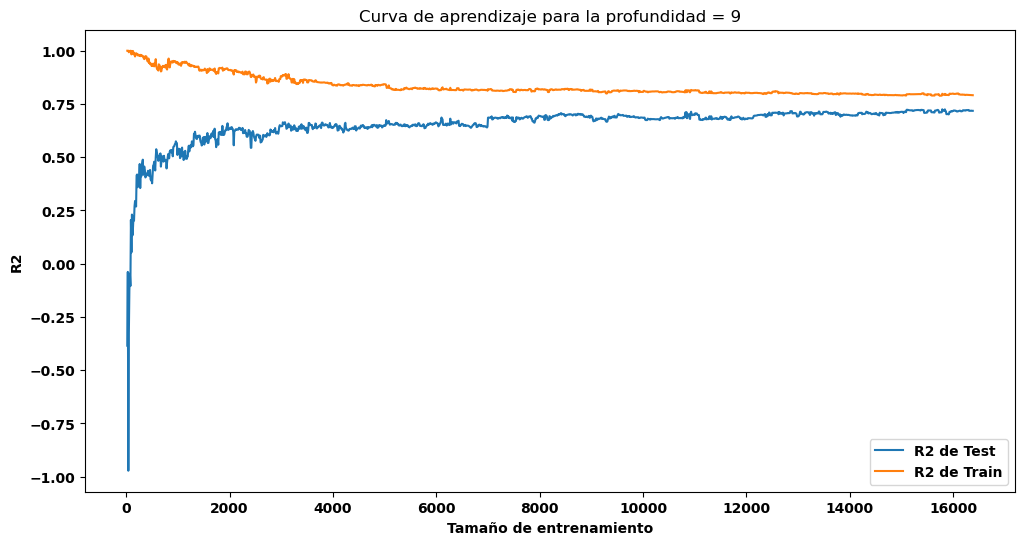

In [29]:
## Solución
# Ejercicio 11.2.5
profundidad = modelo_grid_11_2.best_estimator_.get_depth()

curva_aprendizaje_11_2(profundidad)

> #### Explicación 11.2.5
> Dada esta curva de aprendizaje, podemos observar que las gráficas de los conjuntos de Train y Test **no terminan de converger** en ningun momento, pero es cierto que **la tendencia del conjunto de Test es, sin duda, ascendente**. El **gap entre ambas gráficas va disminuyendo** según aumenta el tamaño del entrenamiento, lo que nos puede dar a entender que en algun punto según aumente dicho tamaño, **podrían llegar a converger**.
>
> En base a estas conclusiones, también podemos observar que el **riesgo de sufrir overfitting es baja**, pero si que deberiamos tener presente la tendencia descendiente que comienza a tener el conjunto de entrenamiento.
>
> Hay que tener también en cuenta que nuestra gráfica para el conjunto de Test demuestra que el modelo **va aprendiendo progresivamente**, pero es cierto que **los valores de R2 no aumente de forma brusca**, sino más bien poco a poco, esto es tambien un factor a tener en cuenta para saber si el modelo, a largo plazo, se acabará estancando o no.
>
> Comparado con modelos previamente usados en esta misma sesión, podemos decir que tiene probabilidades de ser un modelo preferente por ahora, pero no de una forma tan notoria como modelos vistos en otras sesiones.

---

#### Random Forest

### **`Ejercicio 11.3`**

**`11.3.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para el rango de tamaño del bosque entre `10` y `300` **inclusive** con pasos de `10` (poniendo `random_state=100`).  

**`11.3.2`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para el rango de profundidades de los árboles del bosque entre `2` y `40` **inclusive** considerando el número óptimo de los árboles estimado en el paso anterior (poniendo `random_state=100`). 

**`11.3.3`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para diferentes números de predictores considerados en cada bifurcación de los árboles, considerando el número óptimo de los árboles estimado y la profundidad máxima estimada en los puntos anteriores (poniendo `random_state=100`). 

**`11.3.4`** Para el modelo con los hiperparámetros óptimos que se intuyen de los pasos anteriores, Calcula diferentes métricas para evaluarlo y analiza su rendimiendo en comparación con otros modelos desarrollados anteriormente.
- MAE  
- MAPE  
- MSE  
- RMSE  
- $R^2$  
- OOB $R^2$  
    
**`11.3.5`** Visualiza los resultados de este último modelo mediante la gráfica de *"Valores reales vs. predichos"* para el conjunto de test. 

**`11.3.6`** Saca la gráfica del *Learning Curve* para el modelo estimado, definiendo y aplicando una función nueva al respecto y explica si este modelo tiene un buen rendimiento comparando con modelos anteriores.


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


El mejor valor de n_estimators podría ser = 290  que consigue un R2 = 0.8270287255422352


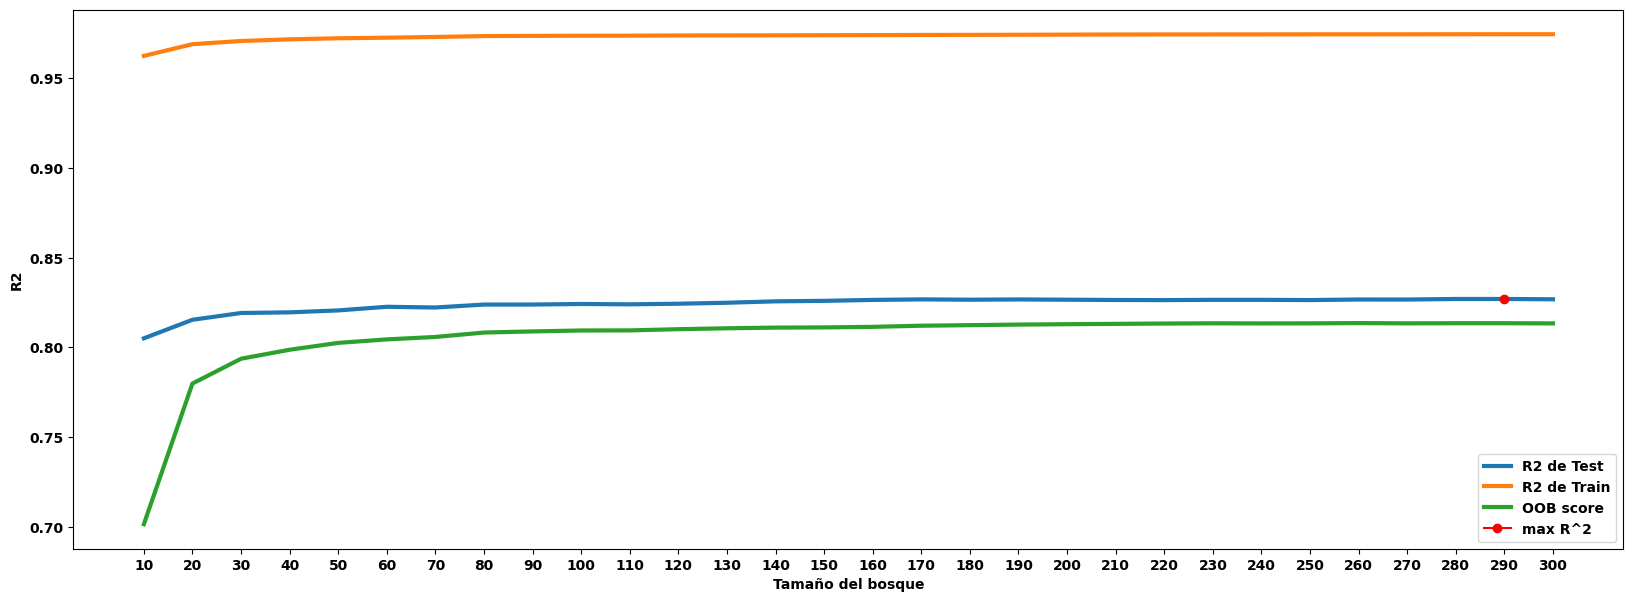

In [30]:
## Solución
# Ejercicio 11.3.1
from sklearn.ensemble import RandomForestRegressor

hiper_param_11_3 = np.arange(10, 301, 10)
    
train_r2_11_3 = np.zeros(hiper_param_11_3.size) 
test_r2_11_3 = np.zeros(hiper_param_11_3.size)
oob_score_11_3 = np.zeros(hiper_param_11_3.size)

for i in range(hiper_param_11_3.size):
    mod_bosque_11_3 = RandomForestRegressor(n_estimators=hiper_param_11_3[i],
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=100)
    mod_bosque_11_3.fit(X_train, y_train)
    train_r2_11_3[i] = r2_score(y_train, mod_bosque_11_3.predict(X_train)) 
    test_r2_11_3[i] = r2_score(y_test, mod_bosque_11_3.predict(X_test))    
    oob_score_11_3[i] = mod_bosque_11_3.oob_score_  

print("El mejor valor de n_estimators podría ser =", hiper_param_11_3[np.argmax(test_r2_11_3)],
      " que consigue un R2 =", max(test_r2_11_3))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_11_3, test_r2_11_3, linewidth=3, label='R2 de Test')
plt.plot(hiper_param_11_3, train_r2_11_3, linewidth=3, label='R2 de Train')
plt.plot(hiper_param_11_3, oob_score_11_3, linewidth=3, label='OOB score')
plt.plot(hiper_param_11_3[np.argmax(test_r2_11_3)], max(test_r2_11_3),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_11_3)
plt.xlabel('Tamaño del bosque')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de la profundidad podría ser = 31  que consigue un R2 = 0.8272975220000935


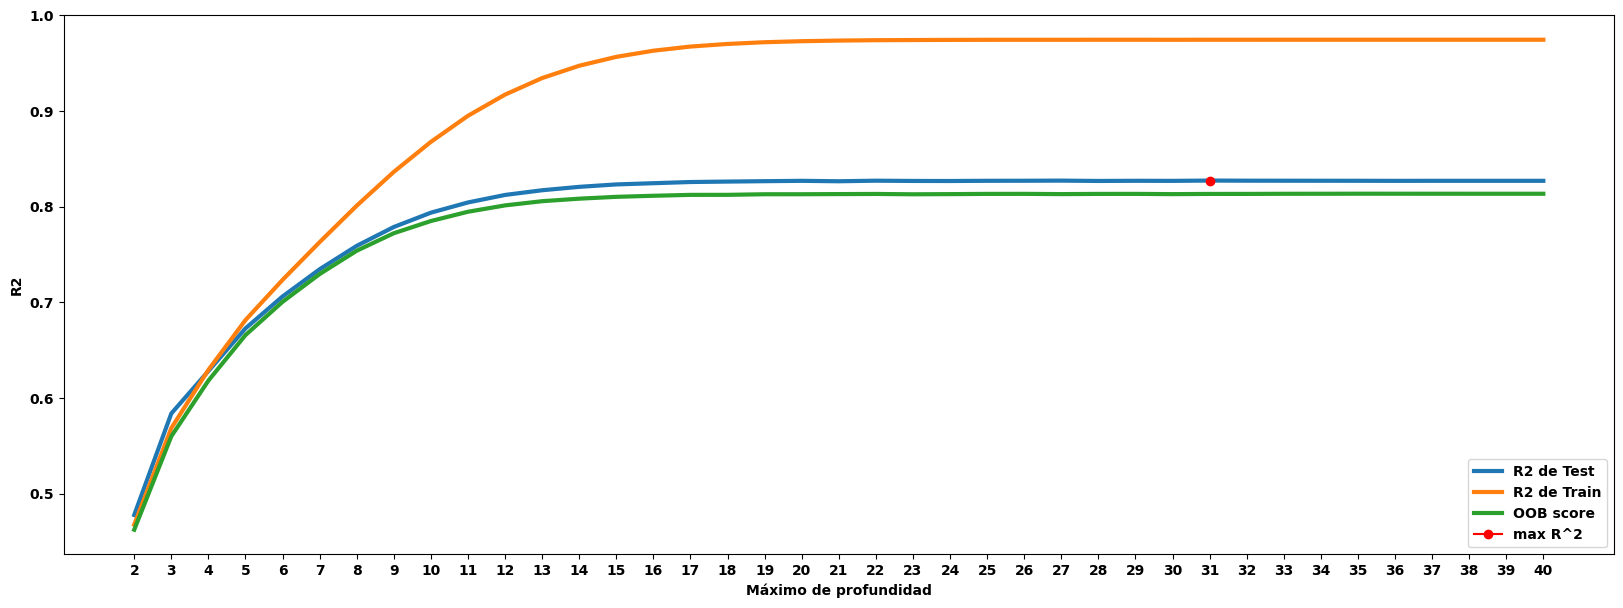

In [31]:
## Solución
# Ejercicio 11.3.2
hiper_param_11_3_2 = np.arange(2,41)
n_estimator = hiper_param_11_3[np.argmax(test_r2_11_3)]
    
train_r2_11_3_2 = np.zeros(hiper_param_11_3_2.size) 
test_r2_11_3_2 = np.zeros(hiper_param_11_3_2.size)
oob_score_11_3_2 = np.zeros(hiper_param_11_3_2.size)

for i in range(hiper_param_11_3_2.size):
    mod_bosque_11_3_2 = RandomForestRegressor(n_estimators=n_estimator,
                                              max_depth=hiper_param_11_3_2[i],
                                              random_state=100,
                                              oob_score=True,
                                              n_jobs=-1)
    mod_bosque_11_3_2.fit(X_train, y_train)
    train_r2_11_3_2[i] = r2_score(y_train, mod_bosque_11_3_2.predict(X_train))
    test_r2_11_3_2[i] = r2_score(y_test, mod_bosque_11_3_2.predict(X_test))
    oob_score_11_3_2[i] = mod_bosque_11_3_2.oob_score_

print("El mejor valor de la profundidad podría ser =", hiper_param_11_3_2[np.argmax(test_r2_11_3_2)],
      " que consigue un R2 =", max(test_r2_11_3_2))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_11_3_2, test_r2_11_3_2, linewidth=3, label='R2 de Test')
plt.plot(hiper_param_11_3_2, train_r2_11_3_2, linewidth=3, label='R2 de Train')
plt.plot(hiper_param_11_3_2, oob_score_11_3_2, linewidth=3, label='OOB score')
plt.plot(hiper_param_11_3_2[np.argmax(test_r2_11_3_2)], max(test_r2_11_3_2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_11_3_2)
plt.xlabel('Máximo de profundidad')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_features podría ser = 2  que consigue un R2 = 0.837440924927488


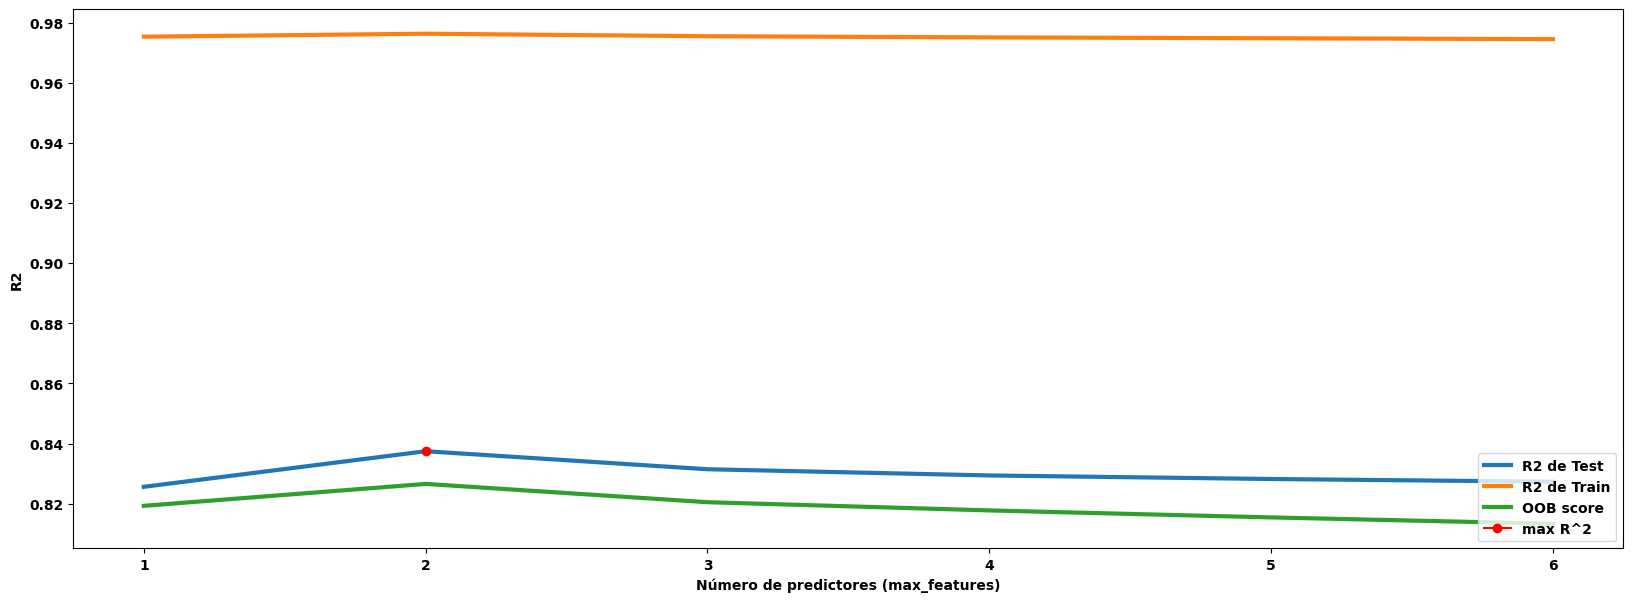

In [32]:
## Solución
# Ejercicio 11.3.3
hiper_param_11_3_3 = np.arange(1, X_train.shape[1] + 1, 1)
n_estimator = hiper_param_11_3[np.argmax(test_r2_11_3)]
max_depth = hiper_param_11_3_2[np.argmax(test_r2_11_3_2)]
    
train_r2_11_3_3 = np.zeros(hiper_param_11_3_3.size)
test_r2_11_3_3 = np.zeros(hiper_param_11_3_3.size) 
oob_score_11_3_3 = np.zeros(hiper_param_11_3_3.size)

for i in range(hiper_param_11_3_3.size):
    mod_bosque_11_3_3 = RandomForestRegressor(n_estimators=n_estimator,
                                              max_depth=max_depth,
                                              max_features=hiper_param_11_3_3[i],
                                              random_state=100,
                                              oob_score=True,
                                              n_jobs=-1)
    mod_bosque_11_3_3.fit(X_train, y_train)
    train_r2_11_3_3[i] = r2_score(y_train, mod_bosque_11_3_3.predict(X_train))
    test_r2_11_3_3[i] = r2_score(y_test, mod_bosque_11_3_3.predict(X_test))
    oob_score_11_3_3[i] = mod_bosque_11_3_3.oob_score_

print("El mejor valor de max_features podría ser =", hiper_param_11_3_3[np.argmax(test_r2_11_3_3)],
      " que consigue un R2 =", max(test_r2_11_3_3))

fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param_11_3_3, test_r2_11_3_3, linewidth=3, label='R2 de Test')
plt.plot(hiper_param_11_3_3, train_r2_11_3_3, linewidth=3, label='R2 de Train')
plt.plot(hiper_param_11_3_3, oob_score_11_3_3, linewidth=3, label='OOB score')
plt.plot(hiper_param_11_3_3[np.argmax(test_r2_11_3_3)], max(test_r2_11_3_3),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param_11_3_3)
plt.xlabel('Número de predictores (max_features)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

In [33]:
## Solución
# Ejercicio 11.3.4
n_estimators_11_3_4 = hiper_param_11_3[np.argmax(test_r2_11_3)]
max_depth_11_3_4 = hiper_param_11_3_2[np.argmax(test_r2_11_3_2)]
max_features_11_3_4 = hiper_param_11_3_3[np.argmax(test_r2_11_3_3)]

mod_bosque_11_3_3 = RandomForestRegressor(random_state=100,
                                          n_estimators=n_estimators_11_3_4,
                                          max_depth=max_depth_11_3_4,
                                          max_features=max_features_11_3_4,
                                          oob_score=True,
                                          n_jobs=-1)
mod_bosque_11_3_3.fit(X_train, y_train)

y_pred_11_3_3 = mod_bosque_11_3_3.predict(X_test)

In [34]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_11_3_3))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_11_3_3)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_11_3_3))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_11_3_3)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_11_3_3))
print('R^2 of OOB:', mod_bosque_11_3_3.oob_score_)

Mean Absolute Error: 0.30454204331547396
Mean Absolute Percentage Error: 17.294732924610763
Mean Squared Error: 0.2207963682843115
Root Mean Squared Error: 0.46988974056081656
R^2 coefficient of determination: 0.837440924927488
R^2 of OOB: 0.8265703297500392


> #### Explicación 11.3.4
> Dadas las métricas de este modelo, podemos decir que, al menos **hasta este punto de la sesión, son las mejores métricas vistas**. El resto de modelos trabajaban entre coeficientes 0.6-0.7, pero aquí ya hablamos de un modelo de **0.84 aproximadamente**, un modelo que empieza a rendir notoriamente bien.
>
> Tambien podemos fijarnos en el porcentaje medio de error, el cual es hasta la fecha también el mejor, lo que nos ayuda a concluir en que el 83% de los datos aproximadamente son, de media, **bien predichos**.

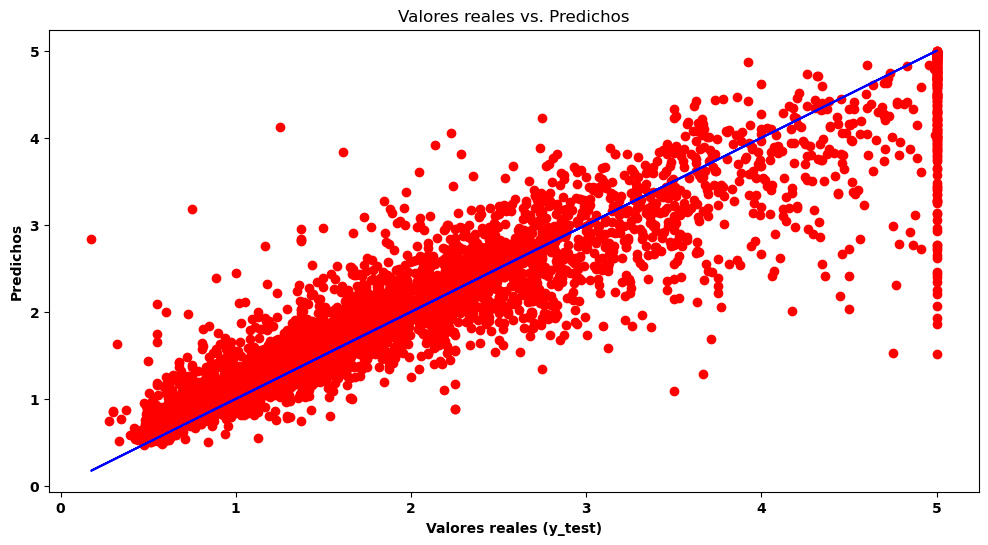

In [35]:
## Solución
# Ejercicio 11.3.5
plt.scatter(y_test, y_pred_11_3_3, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.title('Valores reales vs. Predichos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predichos')
plt.show()

In [36]:
## Solución
# Ejercicio 11.3.6
def curva_aprendizaje_11_3(n_arboles: int,
                         profundidad: int,
                         n_var: int):

    mod_bosque_11_3_6 = RandomForestRegressor(n_estimators=int(n_arboles),
                                          max_depth=int(profundidad),
                                          max_features=int(n_var),
                                          oob_score=True,
                                          n_jobs=-1,
                                          random_state=100)
    
    num_samples = np.linspace(20, X_train.shape[0]).astype(int)

    train_R2_11_3_6 = np.zeros(num_samples.size) 
    test_R2_11_3_6 = np.zeros(num_samples.size)
    oob_score_11_3_6 = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        mod_bosque_11_3_6.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        train_R2_11_3_6[i] = r2_score(y_train[:num_samples[i]], mod_bosque_11_3_6.predict(X_train[:num_samples[i]])) 
        test_R2_11_3_6[i] = r2_score(y_test, mod_bosque_11_3_6.predict(X_test))
        oob_score_11_3_6[i] = mod_bosque_11_3_6.oob_score_

    print("La diferencia de R^2 entre training y OOB es =", train_R2_11_3_6[-1]-oob_score_11_3_6[-1])

    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2_11_3_6, label = 'R2 de Train')
    plt.plot(num_samples, train_R2_11_3_6, label = 'R2 de Test')
    plt.plot(num_samples, oob_score_11_3_6, label = 'OOB score')
    plt.title('Curva de aprendizaje (Learning Curve) para max_features = %s' % n_var)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()    


La diferencia de R^2 entre training y OOB es = 0.1497207368456731


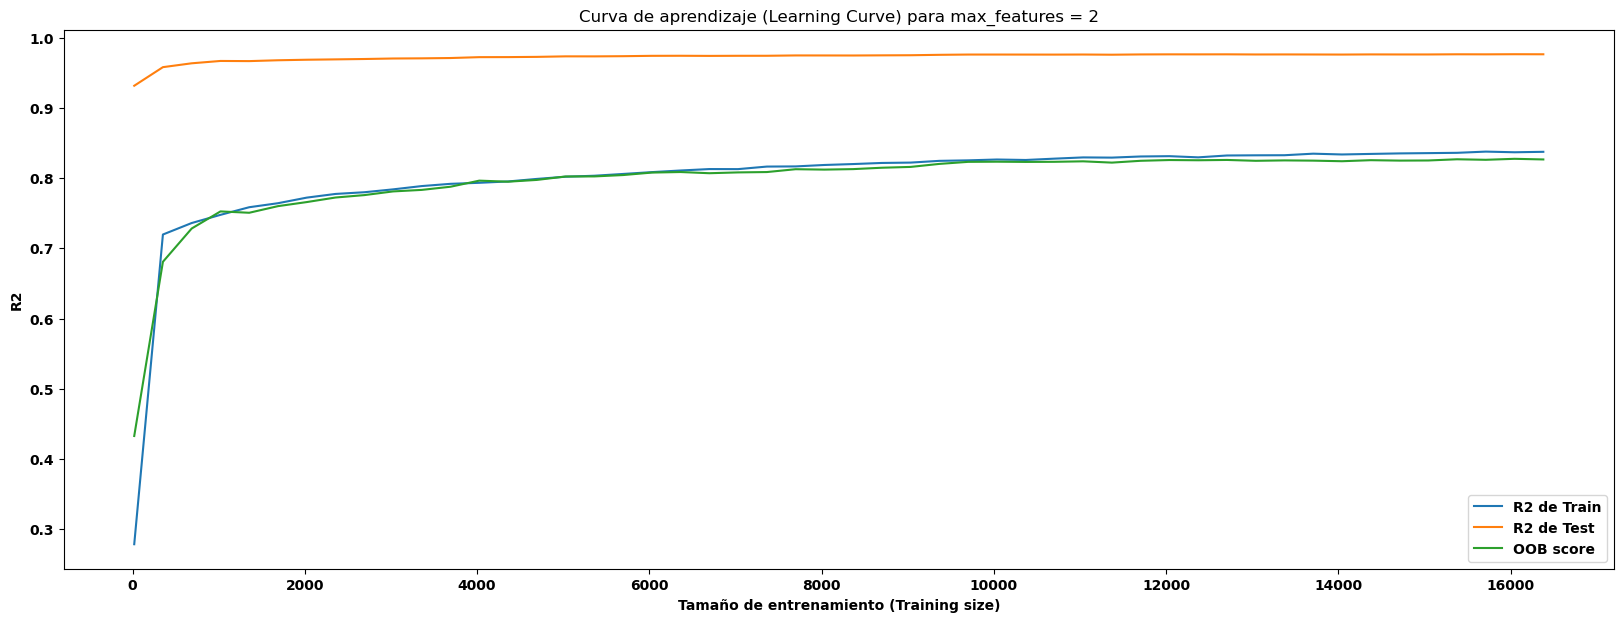

In [37]:
curva_aprendizaje_11_3(
    n_arboles=n_estimators_11_3_4,
    profundidad=max_depth_11_3_4,
    n_var=max_features_11_3_4
)

> #### Explicación 11.3.6
> Con base a esta curva de aprendizaje, podemos observar que la **tendencia** para el conjunto de test en este modelo es **ascendente**, y según aumenta el tamaño del entrenamiento, poco a poco va aumentando el rendimiento del modelo. El **gap entre ambos conjuntos también va disminuyendo** poco a poco gracias a la tendencia ascendente del conjunto de test.
>
> Observando la gráfica podemos llegar a varias conclusiones. Una de ellas es el pensamiento de la curva de aprendizaje nos pueden llevar a creer que, según aumente el tamaño del entrenamiento, la tendencia de la grafica del conjunto de test debería seguir ascendiendo, de una forma más o menos brusca. Pero por otro lado, si que deberíamos tener presente la posibilidad de que, a la larga, el riesgo de **underfitting** aumente, y que las gráficas nunca lleguen a converger.

---

### Neural Networks

### **`Ejercicio 11.4`**

Vamos a realizar otro tipo de modelo de regresión:

**`11.4.1`** Construye como ejercicios anteriores en este bloque, un modelo de *Regresión con Redes Neuronales* para este conjunto de variables de entrada y la variable de salida (poniendo `random_state=100`) y después calcula diferentes métricas para evaluar este modelo y explica si tiene un rendimiendo aceptable en comparación con los modelos anteriores:  
  
- MAE
- MAPE
- MSE
- RMSE
- $R^2$

**`11.4.2`** Construye otro modelo indicando estos hiperparámetros:
  - hidden_layer_sizes=(20,20)    
  - activation='tanh'    
  - solver='lbfgs'    
  - max_iter=10000    
  - alpha=1e-5    
  - tol=1e-5    
  - random_state=100    

y compara el rendimiento de este nuevo modelo con el resto de los modelos anteriores.

**`11.4.3`** Define una nueva función para sacar la gráfica del *Learning Curve* para las redes neuronales y aplícala para comparar los dos modelos anteriores.

In [38]:
## Solución
# Ejercicio 11.4.1
from sklearn.neural_network import MLPRegressor

red_11_4 = MLPRegressor(random_state=100)

In [39]:
red_11_4.fit(X_train, y_train)

MLPRegressor(random_state=100)

In [40]:
y_pred_11_4 = red_11_4.predict(X_test)

In [41]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_11_4))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_11_4)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_11_4))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_11_4)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_11_4))

Mean Absolute Error: 0.5550757498833576
Mean Absolute Percentage Error: 36.78432603282611
Mean Squared Error: 0.5237683586873467
Root Mean Squared Error: 0.7237184250019801
R^2 coefficient of determination: 0.6143808858720592


> #### Explicación 11.4.1
> Sorprendentemente, y sabiendo lo bien que ha funcionado un modelo basado en redes neuronales en otras sesiones, este modelo vuelve a tener **valores para el coeficiente de determinación bajos**. Y **no es el mejor** de la sesión, ni mucho menos.
>
> El porcentaje de error medio es posiblemente el **peor de todos** los modelos de esta sesión, con un porcentaje de acierto de menos del **70%** de acierto.
>
> Es obvio que es un modelo sin ningun tipo de pulido, y que sería necesario trabajarlo más para obtener **rendimientos mejores**.

In [42]:
## Solución
# Ejercicio 11.4.2
red_11_4_2 = MLPRegressor(hidden_layer_sizes=(20,20),
                        activation='tanh',
                        solver='lbfgs',
                        max_iter=10000,
                        alpha=1e-5,
                        tol=1e-5,
                        random_state=100)

In [43]:
red_11_4_2.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20, 20),
             max_iter=10000, random_state=100, solver='lbfgs', tol=1e-05)

In [44]:
y_pred_11_4_2 = red_11_4_2.predict(X_test)

In [45]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_11_4_2))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_11_4_2)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_11_4_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_11_4_2)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_11_4_2))

Mean Absolute Error: 0.4521019815727238
Mean Absolute Percentage Error: 28.023159546727534
Mean Squared Error: 0.39313949799749814
Root Mean Squared Error: 0.6270083715529627
R^2 coefficient of determination: 0.7105550527595071


> #### Explicación 11.4.2
> Este nuevo modelo, con datos más pulidos y trabajados (no es un podelo "por defecto") hacen que, en comparación a la red neuronal anterior, **mejora algo**.
> Este modelo presenta valores para R2 algo mayores que el modelo por defecto, y un **porcentaje medio de error mejor** que la red anterior. Pero sigue siendo **un modelo con un rendimiento no muy destacable**.
> 
> No es el mejor modelo de la sesión, ya que **el modelo de Random Forest presentaba mejores coeficientes.** 

In [46]:
## Solución
# Ejercicio 11.4.3
def curva_aprendizaje_red_11_4(capas_ocultas: tuple=(100,),
                         funcion_activacion: str='relu',
                         optimizador: str='adam',
                         alpha: float=0.0001,
                         tol: float=0.0001,
                         max_iter: int=200):

    mod_red_11_4_3 = MLPRegressor(hidden_layer_sizes=capas_ocultas,
                              activation=funcion_activacion,
                              solver=optimizador,
                              max_iter=max_iter,
                              tol=tol,
                              alpha=alpha,
                              random_state=100)
    num_samples = np.linspace(10, X_train.shape[0]).astype(int)

    train_R2_11_4_3 = np.zeros(num_samples.size) 
    test_R2_11_4_3 = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        mod_red_11_4_3.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        train_R2_11_4_3[i] = r2_score(y_train[:num_samples[i]], mod_red_11_4_3.predict(X_train[:num_samples[i]])) 
        test_R2_11_4_3[i] = r2_score(y_test, mod_red_11_4_3.predict(X_test))

    print("La diferencia de R^2 entre training y test es =", train_R2_11_4_3[-1]-test_R2_11_4_3[-1])

    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2_11_4_3, label = 'R2 de Test')
    plt.plot(num_samples, train_R2_11_4_3, label = 'R2 de Train')
    plt.title('Curva de aprendizaje (Learning Curve) de la red neuronal')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()

In [47]:
red_11_4

MLPRegressor(random_state=100)

In [48]:
red_11_4_2

MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=(20, 20),
             max_iter=10000, random_state=100, solver='lbfgs', tol=1e-05)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


La diferencia de R^2 entre training y test es = -0.004426086612040581


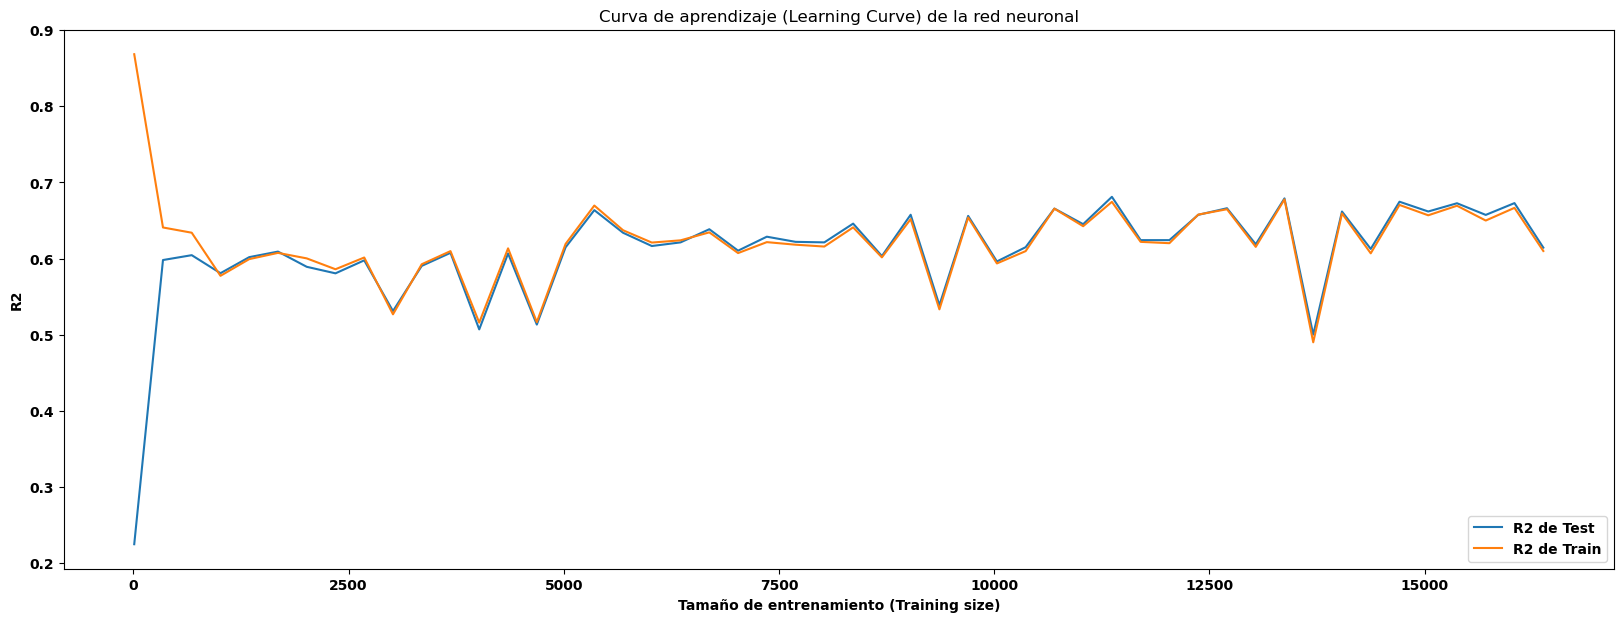

In [49]:
# Curva de la red inicial
curva_aprendizaje_red_11_4()

La diferencia de R^2 entre training y test es = -0.006193079989407102


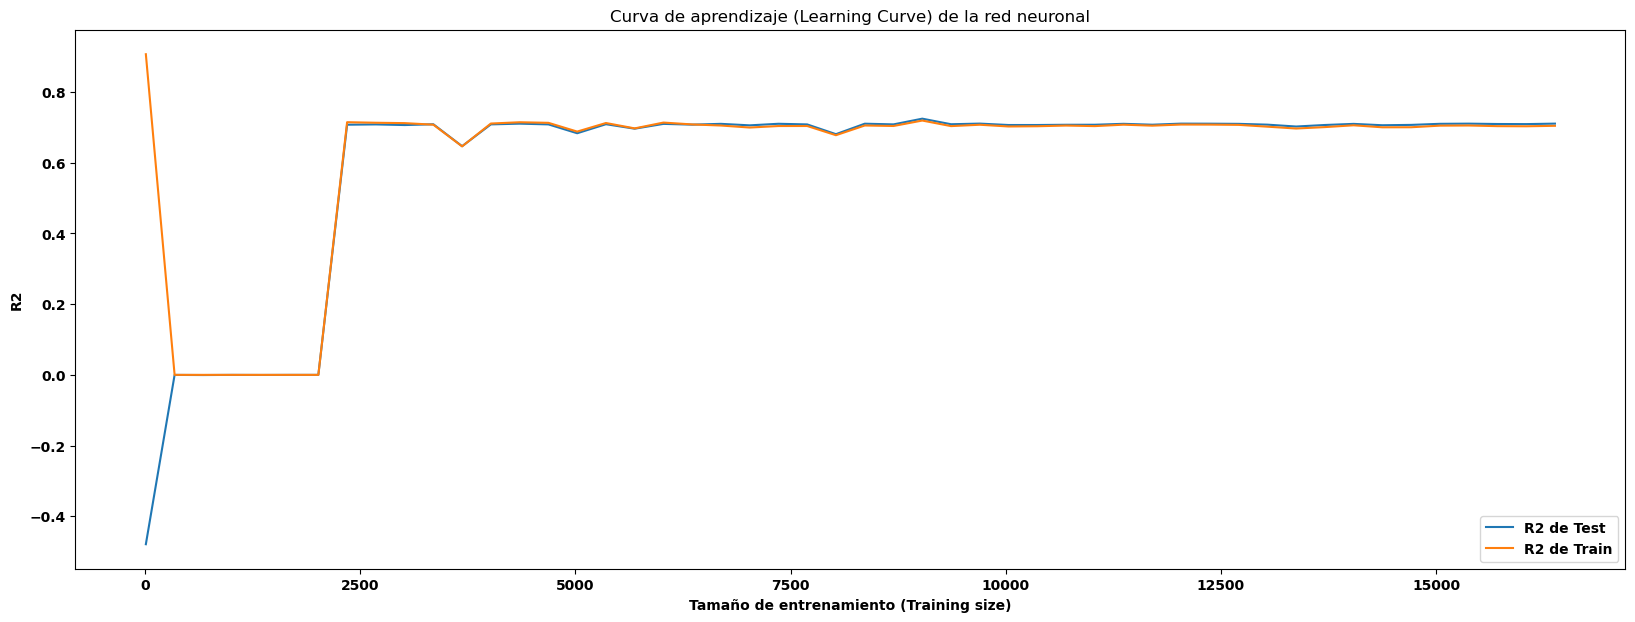

In [50]:
# Curva de la red con hiperparámetros
curva_aprendizaje_red_11_4(
    capas_ocultas=red_11_4_2.hidden_layer_sizes,
    funcion_activacion=red_11_4_2.activation,
    optimizador=red_11_4_2.solver,
    alpha=red_11_4_2.alpha,
    tol=red_11_4_2.tol,
    max_iter=red_11_4_2.max_iter
)

> #### Explicación 11.4.3
> La gráfica de la curva de aprendizaje para el modelo por defecto presenta un riesgo de **unferfitting** alto y valores para el coeficiente de R2 muy dispersos y **no del todo óptimos**, ambas graficas para este modelo convergen varias veces durante el tamaño del entranmiento, reduciendo su gap al mínimo. La tendencia es **muy dispersa** durante toda la gráfica.
>
> Por otro lado, para el modelo con hiperparámetros definidos, presenta un gráfica que posiblemente sufre de **overfitting**, donde los datos del conjunto de Train y Test **se solapan constantemente** y muestran coeficientes muy similares, el valor de R2 para todo el tamaño del entrenamiento es **constante** y no asciende ni desciende considerablemente.